In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    if i != 9:
        dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
        files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,5,10,20,Tree val,Naive,UV
0,0.875000,0.571429,0.625000,0.857143,0.142857,0.857143
1,1.000000,0.750000,0.625000,0.750000,0.375000,0.875000
2,0.857143,0.714286,0.750000,0.875000,0.500000,0.857143
3,1.000000,0.875000,0.750000,1.000000,0.500000,0.857143
4,0.714286,1.000000,0.875000,1.000000,0.500000,0.857143
...,...,...,...,...,...,...
10,0.750000,0.750000,0.750000,1.000000,0.571429,1.000000
11,1.000000,0.875000,1.000000,0.625000,0.250000,0.857143
12,0.714286,0.750000,0.875000,0.857143,0.285714,0.833333
13,0.857143,0.714286,0.571429,1.000000,0.285714,0.714286


In [5]:
length_df

,5,10,20,Tree val,Naive,UV
0,2.675027,1.990119,2.655418,25.125302,1.662982,2.876215
1,2.855371,2.749850,1.752813,71.416975,1.702069,2.986821
2,2.890200,3.652723,2.699112,47.221536,1.549689,2.739068
3,3.612691,2.871975,9.392442,26.028213,1.797158,2.587974
4,3.011319,3.004362,3.801564,9.850210,1.590127,2.965723
...,...,...,...,...,...,...
10,2.758783,1.782485,1.568349,16.257396,1.723253,3.092806
11,3.691813,2.248678,18.270750,67.323309,1.692613,2.649894
12,3.091721,2.082801,2.101435,24.990293,1.383410,2.699877
13,3.081957,1.686000,2.997462,32.883563,1.664412,3.323682


In [6]:
MSE_df

,5,10,20,Tree val,Naive,UV
0,4.416294,3.986681,3.828857,4.281061,4.281061,5.312815
1,4.251149,4.196548,4.312625,4.711709,4.711709,5.169365
2,5.041635,4.964935,5.275481,5.577269,5.577269,5.180766
3,4.374850,4.471546,4.564497,4.958521,4.958521,5.264248
4,4.529787,4.156564,4.470929,4.594089,4.594089,5.012439
...,...,...,...,...,...,...
10,5.604879,5.715419,5.933688,5.797043,5.797043,6.420580
11,4.269421,4.151085,4.162451,4.528662,4.528662,4.892985
12,4.691061,4.859771,4.454150,5.057375,5.057375,5.436167
13,4.770182,4.363072,4.077494,4.727241,4.727241,5.715244


In [9]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5           0.863568
10          0.783730
20          0.808579
Tree val    0.922005
Naive       0.428052
UV          0.890542
dtype: float64
Length :
 5           3.300671
10          3.164868
20          4.070567
Tree val         inf
Naive       1.628160
UV          2.753173
dtype: float64
MSE :
 5           4.750933
10          4.616068
20          4.552244
Tree val    4.956306
Naive       4.956306
UV          5.381217
dtype: float64


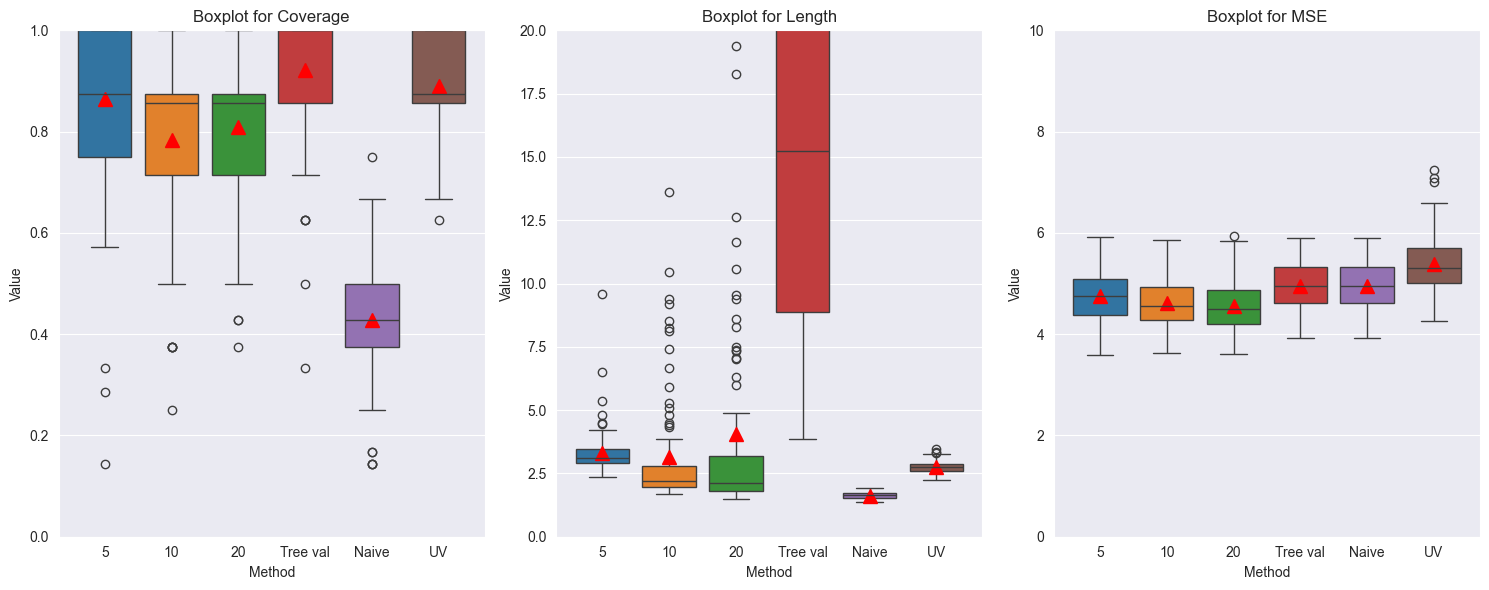

In [10]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])